# Classificador associativo

Pretende prever fatalidade do acidente

In [3]:
import pandas as pd
import os
#loading and joining the tables based on the first colum "numero_boletim" or"num_boletim"
def load_and_concatenate_csvs(directory_path, delimiter=';'):
    csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
    dataframes = []
    for file in csv_files:
        file_path = os.path.join(directory_path, file)
        try:
            df = pd.read_csv(file_path, encoding='utf-8', delimiter=delimiter, on_bad_lines='skip')
        except UnicodeDecodeError:
            df = pd.read_csv(file_path, encoding='latin1', delimiter=delimiter, on_bad_lines='skip')
        dataframes.append(df)
    return pd.concat(dataframes, ignore_index=True)


si_bol_path = './si-bol'
si_env_path = './si-env'
si_veic_path = './si-veic'
si_log_path = './si-log'
pd.options.display.max_columns = None

df_si_bol = load_and_concatenate_csvs(si_bol_path)
df_si_env = load_and_concatenate_csvs(si_env_path)
df_si_veic = load_and_concatenate_csvs(si_veic_path)
df_si_log = load_and_concatenate_csvs(si_log_path)

print("si-bol DataFrame shape:", df_si_bol.shape)
print("si-env DataFrame shape:", df_si_env.shape)
print("si-veic DataFrame shape:", df_si_veic.shape)
print("si-log DataFrame shape:", df_si_log.shape)


df_si_env.rename(columns={'num_boletim': 'numero_boletim'}, inplace=True)

joined_df = df_si_bol.merge(df_si_env, on="numero_boletim", how="outer")
joined_df = joined_df.merge(df_si_veic, on="numero_boletim", how="outer" )
joined_df = joined_df.merge(df_si_log, on="numero_boletim", how="outer")

joined_df.drop_duplicates().dropna().head()


si-bol DataFrame shape: (44371, 23)
si-env DataFrame shape: (99485, 16)
si-veic DataFrame shape: (78867, 11)
si-log DataFrame shape: (59955, 16)


,numero_boletim,data hora_boletim,data_inclusao,tipo_acidente,desc_tipo_acidente,cod_tempo,desc_tempo,cod_pavimento,pavimento,cod_regional,desc_regional,origem_boletim,local_sinalizado,velocidade_permitida,coordenada_x,coordenada_y,hora_informada,indicador_fatalidade,valor_ups,descricao_ups,data_alteracao_smsa,valor_ups_antiga,descricao_ups_antiga,data_hora_boletim_x,numero_envolvido,condutor,codigo_severidade,desc_severidade,sexo,cinto_seguranca,Embreagues,Idade,nascimento,categoria_habilitacao,descricao_habilitacao,declaracao_obito,cod_severidade_antiga,especie_veiculo,data_hora_boletim_y,sequencial_veiculo,codigo_categoria,descricao_categoria,codigo_especie,descricao_especie,codigo_situacao,descricao_situacao,tipo_socorro,descricao_tipo_socorro,data_boletim,numero_municipio,nome_municipio,sequencia_logradouros,numero_logradouro,tipo_logradouro,nome_logradouro,tipo_logradouro_anterior,nome_logradoro_anterior,Numero_bairro,nome_bairro,tipo_bairro,descricao_tipo_bairro,numero_imovel,numero_imovel_proximo
0,90,31/12/2012 21:51,20/08/2013 00:00,H02002,CAPOTAMENTO/TOMBAMENTO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,22,NOROESTE,NI,NÃO INFORMADO,0,60599914.0,79978652.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,31/12/2012 21:51,1,SIM,1,NAO FATAL,M,SIM,NÃO INFORMADO,49,21/12/1963,C,"VEIC. MOTOR. P/ TRANSP. DE CARGA, C/ PESO MAX....",0,0,AUTOMOVEL,31/12/2012 21:51,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,1.0,EM MOVIMENTO,3.0,AMBULANCIA,31/12/2012 21:51,1.0,BELO HORIZONTE,1.0,94910.0,RUA,FLOR DO AMENDOIM ...,NI,NÃO INFORMADO ...,1172.0,JARDIM ALVORADA ...,B,BAIRRO,223,0.0
1,90,31/12/2012 21:51,20/08/2013 00:00,H02002,CAPOTAMENTO/TOMBAMENTO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,22,NOROESTE,NI,NÃO INFORMADO,0,60599914.0,79978652.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,31/12/2012 21:51,2,NÃO,1,NAO FATAL,F,NÃO INFORMADO,NÃO INFORMADO,46,06/07/1966,N,NAO INFORMADO ...,0,0,,31/12/2012 21:51,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,1.0,EM MOVIMENTO,3.0,AMBULANCIA,31/12/2012 21:51,1.0,BELO HORIZONTE,1.0,94910.0,RUA,FLOR DO AMENDOIM ...,NI,NÃO INFORMADO ...,1172.0,JARDIM ALVORADA ...,B,BAIRRO,223,0.0
2,132,31/12/2014 22:30,11/06/2015 00:00,H08002,CHOQUE MECANICO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,24,OESTE,PMMG,NÃO INFORMADO,0,0.0,0.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,31/12/2014 22:30,1,SIM,3,SEM FERIMENTOS,M,NÃO INFORMADO,NÃO INFORMADO,51,23/07/1963,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,AUTOMOVEL,31/12/2014 22:30,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,2.0,PARADO,0.0,NÃO INFORMADO,31/12/2014 22:30,1.0,BELO HORIZONTE,1.0,10320.0,ROD,ANEL RODOVIARIO CELSO MELLO AZEVEDO ...,NI,NÃO INFORMADO ...,717.0,BAIRRO MADRE GERTRUDES ...,B,BAIRRO,KM 536,0.0
3,132,31/12/2014 22:30,11/06/2015 00:00,H08002,CHOQUE MECANICO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,24,OESTE,PMMG,NÃO INFORMADO,0,0.0,0.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,31/12/2014 22:30,1,SIM,3,SEM FERIMENTOS,M,NÃO INFORMADO,NÃO INFORMADO,51,23/07/1963,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,AUTOMOVEL,31/12/2014 22:30,2.0,3.0,PARTICULAR,4.0,MOTOCICLETA,1.0,EM MOVIMENTO,3.0,AMBULANCIA,31/12/2014 22:30,1.0,BELO HORIZONTE,1.0,10320.0,ROD,ANEL RODOVIARIO CELSO MELLO AZEVEDO ...,NI,NÃO INFORMADO ...,717.0,BAIRRO MADRE GERTRUDES ...,B,BAIRRO,KM 536,0.0
4,132,31/12/2014 22:30,11/06/2015 00:00,H08002,CHOQUE MECANICO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,24,OESTE,PMMG,NÃO INFORMADO,0,0.0,0.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,31/12/2014 22:30,2,SIM,1,NAO FATAL,M,NÃO INFORMADO,NÃO INFORMADO,24,23/03/1990,AB,HABILITADO NAS CATEGORIAS A e B ...,0,0,MOTOCICLETA,31/12/2014 22:30,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,2.0,PARADO,0.0,NÃO INFORMADO,31/12/2014 22:30,1.0,BELO HORIZONTE,1.0,10320.0,ROD,ANEL RODOVIARIO CELSO MELLO AZEVEDO ...,NI,NÃO INFORMADO ...,717.0,BAIRRO MADRE GERTRUDES ...,B,BAIRRO,KM 536,0.0


In [4]:
#Eliminando colunas redundantes 

columns_to_be_dropped=["data_inclusao","desc_tipo_acidente",
                       "cod_tempo","pavimento","desc_regional",
                       "velocidade_permitida","origem_boletim",
                       "cod_pavimento","local_sinalizado",
                       "data_alteracao","valor_ups_antiga","cod_severidade_antiga",
                        "valor_ups","descricao_ups","data_alteracao_smsa","descricao_ups_antiga"
                        "desc_severidade","descricao_habilitacao","codigo_situacao",
                        "cod_tipo_socoro", "data_hora_boletim","nome_municipio",
                        "numero_imovel_proximo","numero_imovel","descricao_tipo_bairro",
                        "tipo_bairro","Numero_bairro","sequencia_logradouros","numero_logradouro",
                        "nome_logradouro","tipo_logradouo_anterior","nome_logradoro_anterior"
                        "cod_tipo_socorro","coordenada_x","coordenada_y","descrição_categoria",
                        "cod_especie","tipo_logradouro_anterior"
                        "descricao_ups_antiga","hora_informada","nascimento",
                        "descricao_categoria","numero_municipio","nome_logradoro_anterior","data_boletim",
                        "data_hora_boletim_y","data_hora_boletim_x","descricao_ups_antiga","cod_regional",
                        "tipo_logradouro_anterior","codigo_especie","codigo_categoria","tipo_socorro",
                        "codigo_severidade","declaracao_obito","sequencial_veiculo","numero_envolvido",
                        "desc_tempo","Embreagues","cinto_seguranca","indicador_fatalidade","especie_veiculo"
                       ]
full_df = joined_df
joined_df = joined_df.drop(columns=columns_to_be_dropped, errors='ignore')

joined_df =joined_df.drop_duplicates()
display(joined_df.head())

,numero_boletim,data hora_boletim,tipo_acidente,condutor,desc_severidade,sexo,Idade,categoria_habilitacao,descricao_especie,descricao_situacao,descricao_tipo_socorro,tipo_logradouro,nome_bairro
0,90,31/12/2012 21:51,H02002,SIM,NAO FATAL,M,49,C,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,RUA,JARDIM ALVORADA ...
1,90,31/12/2012 21:51,H02002,NÃO,NAO FATAL,F,46,N,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,RUA,JARDIM ALVORADA ...
2,132,31/12/2014 22:30,H08002,SIM,SEM FERIMENTOS,M,51,B,AUTOMOVEL,PARADO,NÃO INFORMADO,ROD,BAIRRO MADRE GERTRUDES ...
3,132,31/12/2014 22:30,H08002,SIM,SEM FERIMENTOS,M,51,B,MOTOCICLETA,EM MOVIMENTO,AMBULANCIA,ROD,BAIRRO MADRE GERTRUDES ...
4,132,31/12/2014 22:30,H08002,SIM,NAO FATAL,M,24,AB,AUTOMOVEL,PARADO,NÃO INFORMADO,ROD,BAIRRO MADRE GERTRUDES ...


In [5]:
#binning hour of day and age
classification_df = joined_df

classification_df['data hora_boletim'] = pd.to_datetime(classification_df['data hora_boletim'], format='%d/%m/%Y %H:%M')
classification_df['hour'] = classification_df['data hora_boletim'].dt.hour

#hour binning
morning_hours = range(6, 12)  
afternoon_hours = range(12, 18)  
night_hours = list(range(0, 6)) + list(range(18, 24)) 


classification_df['morning'] = classification_df['hour'].apply(lambda x: True if x in morning_hours else False)
classification_df['afternoon'] = classification_df['hour'].apply(lambda x: True if x in afternoon_hours else False)
classification_df['night'] = classification_df['hour'].apply(lambda x: True if x in night_hours else False)

classification_df.drop(columns=['hour','data hora_boletim'], inplace=True)

#age binning

children = range(0,16)
young_adult = range(17,30)
middle_aged = range(31,45)
old_aged = range(45,200)

classification_df['Idade'] =classification_df['Idade'].astype('int')
classification_df['children'] = classification_df['Idade'].apply(lambda x: True if x in children else False)
classification_df['young_adult'] = classification_df['Idade'].apply(lambda x: True if x in young_adult else False)
classification_df['middle_aged'] = classification_df['Idade'].apply(lambda x: True if x in middle_aged else False)
classification_df['old_aged'] = classification_df['Idade'].apply(lambda x: True if x in old_aged else False)

classification_df.drop(columns=['Idade'], inplace=True)
classification_df.head()

,numero_boletim,tipo_acidente,condutor,desc_severidade,sexo,categoria_habilitacao,descricao_especie,descricao_situacao,descricao_tipo_socorro,tipo_logradouro,nome_bairro,morning,afternoon,night,children,young_adult,middle_aged,old_aged
0,90,H02002,SIM,NAO FATAL,M,C,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,RUA,JARDIM ALVORADA ...,False,False,True,False,False,False,True
1,90,H02002,NÃO,NAO FATAL,F,N,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,RUA,JARDIM ALVORADA ...,False,False,True,False,False,False,True
2,132,H08002,SIM,SEM FERIMENTOS,M,B,AUTOMOVEL,PARADO,NÃO INFORMADO,ROD,BAIRRO MADRE GERTRUDES ...,False,False,True,False,False,False,True
3,132,H08002,SIM,SEM FERIMENTOS,M,B,MOTOCICLETA,EM MOVIMENTO,AMBULANCIA,ROD,BAIRRO MADRE GERTRUDES ...,False,False,True,False,False,False,True
4,132,H08002,SIM,NAO FATAL,M,AB,AUTOMOVEL,PARADO,NÃO INFORMADO,ROD,BAIRRO MADRE GERTRUDES ...,False,False,True,False,True,False,False


In [6]:
#prepping "descricao_veiculo" for one hot encoding

#grouping "tipos de caminhão"
trucks_to_be_grouped =["CAMINHAO-TRATOR","CAMIONETA","REBOQUE E SEMI-REBOQUE","REBOQUE E SEMI-REBOQUE"]
for i in trucks_to_be_grouped:
    classification_df['descricao_especie'] = classification_df['descricao_especie'].str.strip().replace(i,"CAMINHAO")

#grouping "microoonibus"
classification_df['descricao_especie'] = classification_df['descricao_especie'].str.strip().replace("MICROONIBUS","CAMINHAO")

#grouping "motoneta"
classification_df['descricao_especie'] = classification_df['descricao_especie'].str.strip().replace("MOTONETA","MOTOCICLETA")

#grouping "other vehicles"
other_vehicles =["CARRO DE MAO","CARROCA","CICLOMOTOR","ESPECIAL","MISTO","NAO INFORMADO",
                 "TRACAO","TRATOR DE RODAS","TRATOR MISTO","TREM","TRICICLO","CHARRETE"]
for i in other_vehicles:
    classification_df['descricao_especie'] = classification_df['descricao_especie'].str.strip().replace(i,"OUTROS TIPOS DE VEICULOS")
#One hot encoding categorical data

vehicles_one_hot = pd.get_dummies(classification_df['descricao_especie'])
true_counts = vehicles_one_hot.sum()
print(true_counts)
classification_df.drop(columns=['descricao_especie'],inplace=True)

AUTOMOVEL                   91339
BICICLETA                    2748
CAMINHAO                    11157
MOTOCICLETA                 68769
ONIBUS                      18764
OUTROS TIPOS DE VEICULOS     3813
dtype: int64


In [7]:
#prepping "descricao_severidade"
classification_df['desc_severidade'] = classification_df['desc_severidade'].apply(lambda x: "fatalidade:"+ str(x)).str.strip()
desc_severidade_one_hot = pd.get_dummies(classification_df['desc_severidade'])
true_counts = desc_severidade_one_hot.sum()
desc_severidade_one_hot.head()
classification_df.drop(columns=['desc_severidade'],inplace=True)
print(true_counts)

fatalidade:FATAL                823
fatalidade:NAO FATAL         103480
fatalidade:NAO INFORMADO      11651
fatalidade:SEM FERIMENTOS     80641
dtype: int64


In [8]:
#prepping "descricao_situação"
classification_df['descricao_situacao'] = classification_df['descricao_situacao'].str.strip().replace("NÃO INFORMADO","MOVIMENTO NAO INFORMADO")
classification_df['descricao_situacao'] = classification_df['descricao_situacao'].str.strip().replace("","MOVIMENTO NAO INFORMADO")
descricao_situacao_one_hot = pd.get_dummies(classification_df['descricao_situacao'])
true_counts = descricao_situacao_one_hot.sum()
descricao_situacao_one_hot.head()
print(true_counts)
classification_df.drop(columns=['descricao_situacao'],inplace=True)

EM MOVIMENTO               177435
MOVIMENTO NAO INFORMADO      5516
PARADO                      13639
dtype: int64


In [9]:
#prepping "condutor"
classification_df['condutor'] = classification_df['condutor'].apply(lambda x: "condutor:"+ str(x))
condutor_one_hot = pd.get_dummies(classification_df['condutor'])
true_counts = condutor_one_hot.sum()
condutor_one_hot.head()
classification_df.drop(columns=['condutor'],inplace=True)
print(true_counts)

condutor:NÃO               34254
condutor:NÃO INFORMADO       244
condutor:SIM              162097
dtype: int64


In [10]:
#prepping "tipo_logradouo"
to_be_replace =["TRV","TUN","VDP","VDT","VIA"
                ,"BEC","ELP","EST","NI","ALA"]
for r in to_be_replace:
    classification_df['tipo_logradouro'] = classification_df['tipo_logradouro'].str.strip().replace(r,"OUTROS_LOCAIS")
logradouro_one_hot = pd.get_dummies(classification_df['tipo_logradouro'])
true_counts = logradouro_one_hot.sum()
logradouro_one_hot.head()
# classification_df.drop(columns=['tipo_logradouro'],inplace=True)
print(true_counts)

AVE              87675
OUTROS_LOCAIS     2536
PCA               2064
ROD              14637
RUA              89533
dtype: int64


In [11]:
#prepping "sexo"
classification_df['sexo'] = classification_df['sexo'].str.strip().replace("0","sexo nao informado")
sexo_one_hot = pd.get_dummies(classification_df['sexo'])
true_counts = sexo_one_hot.sum()
sexo_one_hot.head()
print(true_counts)
classification_df.drop(columns="sexo",inplace=True)

F                      43226
M                     142391
sexo nao informado     10978
dtype: int64


In [12]:
#encoding "tipo de acidente"
tipo_acidente_one_hot = pd.get_dummies(classification_df['tipo_acidente'])
true_counts = tipo_acidente_one_hot.sum()
tipo_acidente_one_hot.head()

print(true_counts)
classification_df.drop(columns="tipo_acidente",inplace=True)

H01002    97329
H02002     5154
H03002      940
H04000     7638
H05002       97
H06001      524
H06002    17766
H07002      182
H08002    32017
H09002    32097
H99002     2851
dtype: int64


In [13]:
classification_df.drop(columns=["numero_boletim","categoria_habilitacao","tipo_logradouro",'descricao_tipo_socorro'],inplace=True)
concat_dfs= pd.concat([classification_df.reset_index(drop=True),condutor_one_hot.reset_index(drop=True)
                       ,descricao_situacao_one_hot.reset_index(drop=True),
                       vehicles_one_hot.reset_index(drop=True),
                        logradouro_one_hot.reset_index(drop=True),
                         sexo_one_hot.reset_index(drop=True),
                         tipo_acidente_one_hot.reset_index(drop=True),
                         desc_severidade_one_hot.reset_index(drop=True  )],axis=1)

concat_dfs = concat_dfs.drop(columns=['nome_bairro',' H01002', ' H02002', ' H03002',
       ' H04000', ' H05002', ' H06001', ' H06002', ' H07002', ' H08002',
       ' H09002', ' H99002','condutor:NÃO INFORMADO','MOVIMENTO NAO INFORMADO','OUTROS TIPOS DE VEICULOS','OUTROS_LOCAIS','fatalidade:NAO INFORMADO','sexo nao informado'])

In [14]:
concat_dfs.isnull().values.any()
concat_dfs.head()

,morning,afternoon,night,children,young_adult,middle_aged,old_aged,condutor:NÃO,condutor:SIM,EM MOVIMENTO,PARADO,AUTOMOVEL,BICICLETA,CAMINHAO,MOTOCICLETA,ONIBUS,AVE,PCA,ROD,RUA,F,M,fatalidade:FATAL,fatalidade:NAO FATAL,fatalidade:SEM FERIMENTOS
0,False,False,True,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,False,True,False,True,False,True,False
1,False,False,True,False,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False
2,False,False,True,False,False,False,True,False,True,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,False,False,True,False,False,False,True,False,True,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True
4,False,False,True,False,True,False,False,False,True,False,True,True,False,False,False,False,False,False,True,False,False,True,False,True,False


In [15]:
print(concat_dfs.columns)

Index(['morning', 'afternoon', 'night', 'children', 'young_adult',
       'middle_aged', 'old_aged', 'condutor:NÃO', 'condutor:SIM',
       'EM MOVIMENTO', 'PARADO', 'AUTOMOVEL', 'BICICLETA', 'CAMINHAO',
       'MOTOCICLETA', 'ONIBUS', 'AVE', 'PCA', 'ROD', 'RUA', 'F', 'M',
       'fatalidade:FATAL', 'fatalidade:NAO FATAL',
       'fatalidade:SEM FERIMENTOS'],
      dtype='object')


In [16]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import itertools
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [17]:
# Generate frequent itemsets
frequent_itemsets = apriori(concat_dfs, min_support=0.1, use_colnames=True)

# Generate association rules using confidence metric
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filter rules with 'fatalidade' as the consequent
rules = rules[rules['consequents'].apply(lambda x: any('fatalidade' in item for item in x))]

# Convert antecedents and consequents to hashable sets
rules['antecedents'] = rules['antecedents'].apply(lambda x: frozenset(x))
rules['consequents'] = rules['consequents'].apply(lambda x: next(iter(x)))  # Assuming only one consequent per rule


# Create a dictionary for faster rule lookup
rule_dict = {}
for _, row in rules.iterrows():
    antecedent = row['antecedents']
    if antecedent not in rule_dict:
        rule_dict[antecedent] = []
    rule_dict[antecedent].append((row['consequents'], row['confidence']))

print(rules)
  

                       antecedents                consequents  \
8                        (morning)  fatalidade:SEM FERIMENTOS   
16                     (afternoon)  fatalidade:SEM FERIMENTOS   
27                         (night)       fatalidade:NAO FATAL   
40                   (young_adult)       fatalidade:NAO FATAL   
48                   (middle_aged)  fatalidade:SEM FERIMENTOS   
...                            ...                        ...   
2222  (EM MOVIMENTO, condutor:SIM)  fatalidade:SEM FERIMENTOS   
2223                         (RUA)               EM MOVIMENTO   
2225                           (M)               EM MOVIMENTO   
2226                (EM MOVIMENTO)               condutor:SIM   
2227                (condutor:SIM)               EM MOVIMENTO   

      antecedent support  consequent support   support  confidence      lift  \
8               0.311742            0.410188  0.132811    0.426028  1.038616   
16              0.359796            0.410188  0.152379    0

In [18]:
# Split dataset into training and test sets
X = concat_dfs.drop(columns=['fatalidade:FATAL', 'fatalidade:NAO FATAL', 'fatalidade:SEM FERIMENTOS'])
y = concat_dfs[['fatalidade:FATAL', 'fatalidade:NAO FATAL', 'fatalidade:SEM FERIMENTOS']].idxmax(axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Build the classifier

#For each row in the test set, it generates all possible combinations of features that are present (i.e., have a value of 1).
#It looks up these combinations in rule_dict to find matching rules.
#If no rules match, it defaults to predicting 'fatalidade:NAO FATAL'.
#If multiple rules match, it selects the rule with the highest confidence and uses its consequent as the prediction.
class AssociativeClassifier:    
    def __init__(self, rule_dict):
        self.rule_dict = rule_dict
    
    def predict(self, X):
        predictions = []
        for _, row in X.iterrows():
            matching_rules = []
            for combo in itertools.chain.from_iterable(itertools.combinations(row[row == 1].index, r) for r in range(len(row[row == 1].index) + 1)):
                combo = frozenset(combo)
                if combo in self.rule_dict:
                    matching_rules.extend(self.rule_dict[combo])
            if not matching_rules:
                predictions.append('fatalidade:NAO FATAL')  # Default prediction if no rules match (most common class)
            else:
                best_rule = max(matching_rules, key=lambda x: x[1])  # Select the rule with the highest confidence
                predictions.append(best_rule[0])
        return predictions


In [20]:
# Initialize the classifier with the generated rules
classifier = AssociativeClassifier(rule_dict)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

c:\Users\avela\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6485189643771512
Precision: 0.6130211536913494
Recall: 0.6485189643771512
F1-Score: 0.6202229425186195


# Classificador Árvores de Decisão

In [21]:
# Set 'fatalidade:NAO FATAL' to True where 'fatalidade:SEM FERIMENTOS' is True
concat_dfs.loc[concat_dfs['fatalidade:SEM FERIMENTOS'] == True, 'fatalidade:NAO FATAL'] = True

# Drop the 'fatalidade:SEM FERIMENTOS' column
concat_dfs.drop(columns=['fatalidade:SEM FERIMENTOS'], inplace=True)

In [22]:
from sklearn.tree import DecisionTreeClassifier

#SMOTE: Synthetic Minority Over-sampling Technique
from imblearn.over_sampling import SMOTE

In [23]:
# Convert boolean columns to integers
concat_dfs = concat_dfs.astype(int)

X = concat_dfs.drop(columns=['fatalidade:FATAL', 'fatalidade:NAO FATAL'])
y = concat_dfs[['fatalidade:FATAL', 'fatalidade:NAO FATAL']].idxmax(axis=1)


# Split the concat_dfs into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [24]:
# Train a decision tree classifier on the resampled training data
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

In [25]:
# Generate the classification report
report = classification_report(y_test, y_pred_dt, target_names=['fatalidade:FATAL', 'fatalidade:NAO FATAL'])
print(report)

                      precision    recall  f1-score   support

    fatalidade:FATAL       0.68      0.86      0.76      3801
fatalidade:NAO FATAL       0.99      0.97      0.98     55178

            accuracy                           0.96     58979
           macro avg       0.83      0.92      0.87     58979
        weighted avg       0.97      0.96      0.97     58979



In [26]:
# Calculate and print other metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9647162549381983
Precision: 0.9699935835862759
Recall: 0.9647162549381983
F1-Score: 0.9666074828352803


Testing without SMOTE

In [27]:
# Train a decision tree classifier on the resampled training data
dt_classifier_test = DecisionTreeClassifier(random_state=42)
dt_classifier_test.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = dt_classifier_test.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred_test, target_names=['fatalidade:FATAL', 'fatalidade:NAO FATAL'])
print(report)

                      precision    recall  f1-score   support

    fatalidade:FATAL       0.91      0.79      0.84      3801
fatalidade:NAO FATAL       0.99      0.99      0.99     55178

            accuracy                           0.98     58979
           macro avg       0.95      0.89      0.92     58979
        weighted avg       0.98      0.98      0.98     58979



# Visualização do classificador


In [28]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

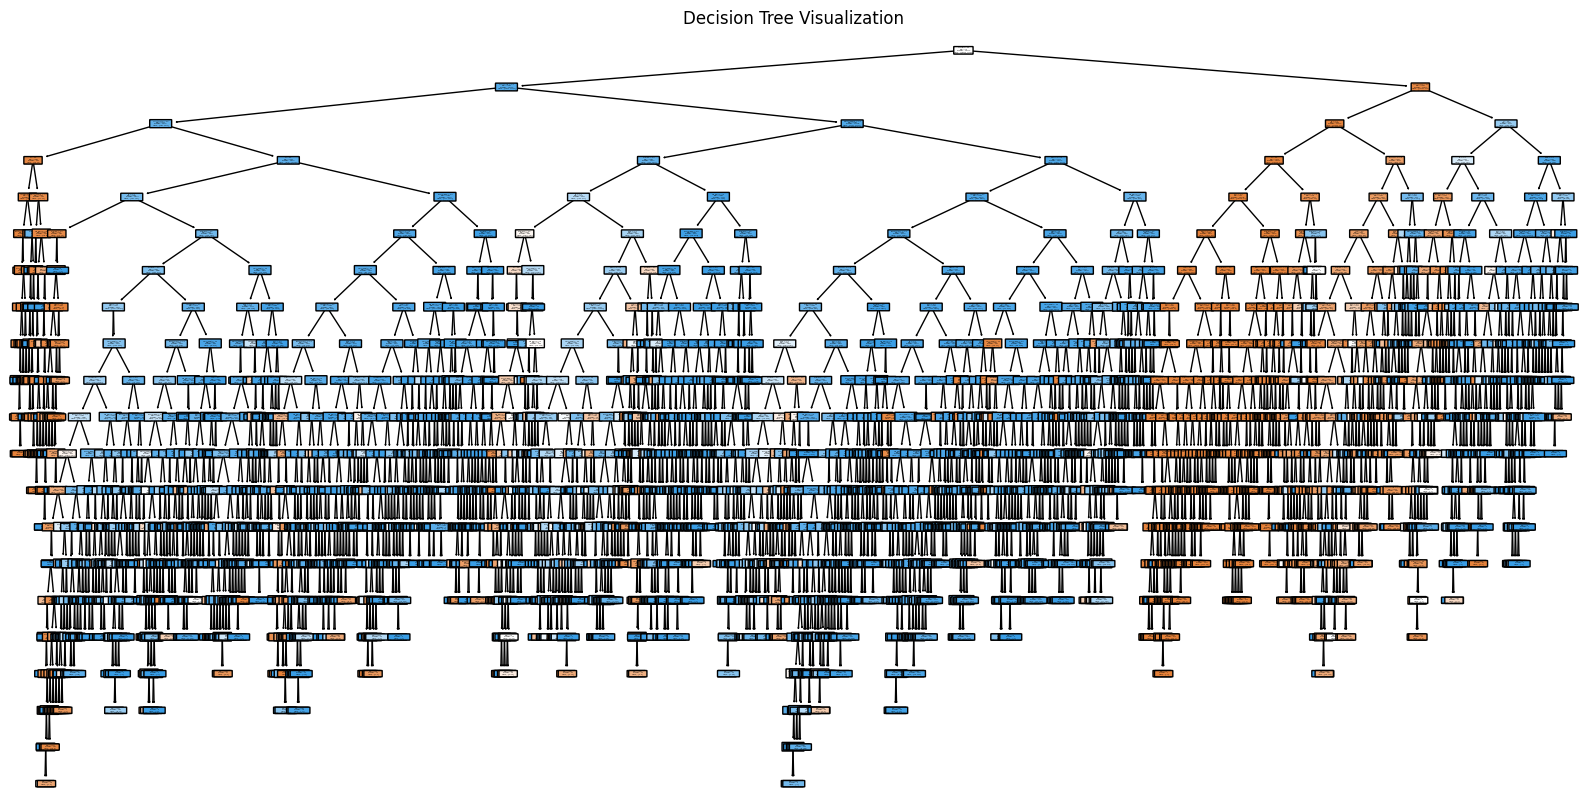

In [32]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['fatalidade:FATAL', 'fatalidade:NAO FATAL'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

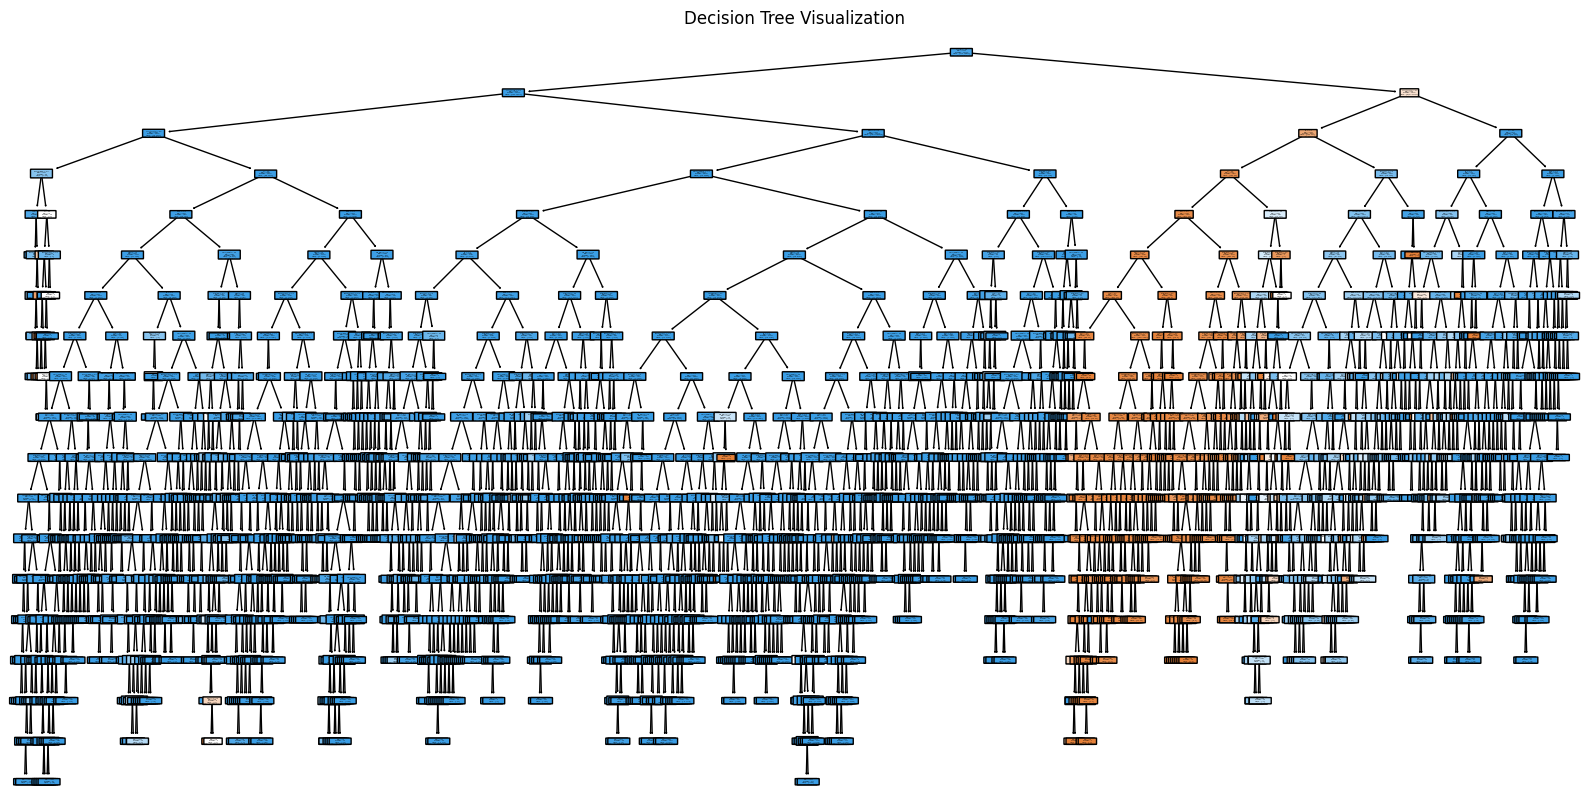

In [33]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier_test, filled=True, feature_names=X.columns, class_names=['fatalidade:FATAL', 'fatalidade:NAO FATAL'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [31]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a DOT file
dot_data = export_graphviz(dt_classifier_test, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['fatalidade:FATAL', 'fatalidade:NAO FATAL'],
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")  # Saves the visualization as a file
graph.view()  # Opens the visualization

'decision_tree.pdf'